## 1-LOADING DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_cleaned = pd.read_csv('/content/student-por.csv')


## PREPROCESSING
### !- Define Target Variable

In [ ]:

def categorize(score):
    if score < 10:
        return 'Low'
    elif 10 <= score < 15:
        return 'Medium'
    else:
        return 'High'

df_cleaned['performance'] = df_cleaned['G3'].apply(categorize)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['performance'] = le.fit_transform(df_cleaned['performance'])


### 2-Droping  Irrelevant Columns

In [ ]:
columns_to_drop = ['address',"school","paid","higher", 'reason', 'guardian', 'romantic', 'famsup', 'nursery', 'goout', 'Walc', 'famrel']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
print("Remaining columns after dropping:")
print(df_cleaned.columns.tolist())

Remaining columns after dropping:
['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'failures', 'schoolsup', 'activities', 'internet', 'freetime', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3', 'performance']


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['sex', 'famsize',"Mjob","Fjob","schoolsup", 'Pstatus', 'activities', 'internet']
le = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
print(df_cleaned[categorical_cols].head())

   sex  famsize  Mjob  Fjob  schoolsup  Pstatus  activities  internet
0    0        0     0     4          1        0           0         0
1    0        0     0     2          0        1           0         1
2    0        1     0     2          1        1           0         1
3    0        0     1     3          0        1           1         1
4    0        0     2     2          0        1           0         0


## DATA VISUALIZATION
### 1-Statistical Summary of Numerical Features

In [ ]:
df_cleaned.describe()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,...,activities,internet,freetime,Dalc,health,absences,G1,G2,G3,performance
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.409861,16.744222,0.295840,0.876733,2.514638,2.306626,1.941448,2.224961,1.568567,1.930663,...,0.485362,0.767334,3.180277,1.502311,3.536210,3.659476,11.399076,11.570108,11.906009,1.442219
std,0.492187,1.218138,0.456771,0.328996,1.134552,1.099931,1.248317,0.863487,0.748660,0.829510,...,0.500171,0.422857,1.051093,0.924834,1.446259,4.640759,2.745265,2.913639,3.230656,0.807071
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,3.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,1.000000
50%,0.000000,17.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,0.000000,1.000000,3.000000,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,2.000000
75%,1.000000,18.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,4.000000,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,2.000000
max,1.000000,22.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,2.000000


### 2-Pair Plot of Important Features

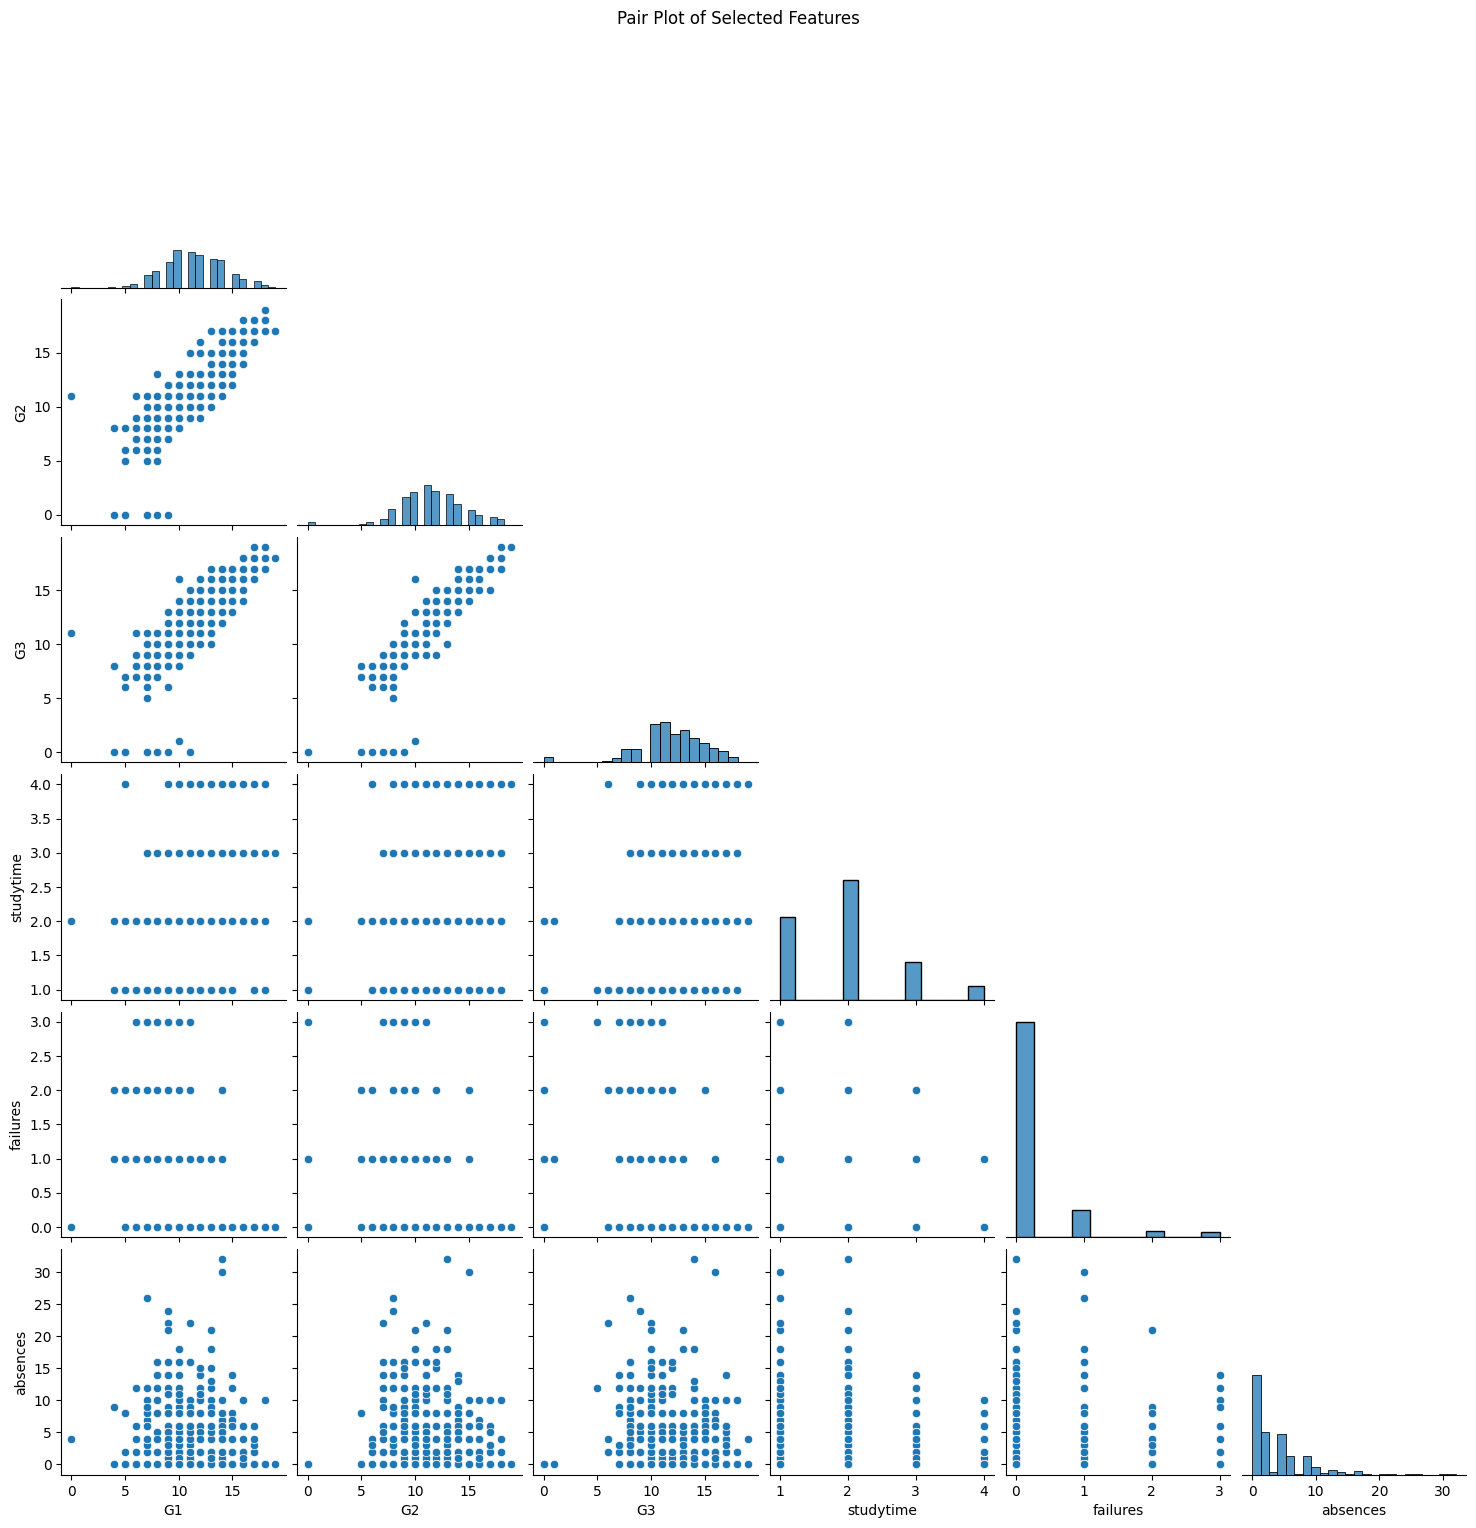

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']
sns.pairplot(df_cleaned[selected_features], corner=True)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


###  3. Bar Plots: Average G3 Grouped by Categorical Features

/tmp/ipython-input-83-2640504830.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='G3', data=df_cleaned, ax=axs[i], palette='viridis')
/tmp/ipython-input-83-2640504830.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='G3', data=df_cleaned, ax=axs[i], palette='viridis')
/tmp/ipython-input-83-2640504830.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='G3', data=df_cleaned, ax=axs[i], palette='viridis')
/tmp/ipython-input-83-2640504830.py:10: FutureWarning: 

Passing `palette` without assignin

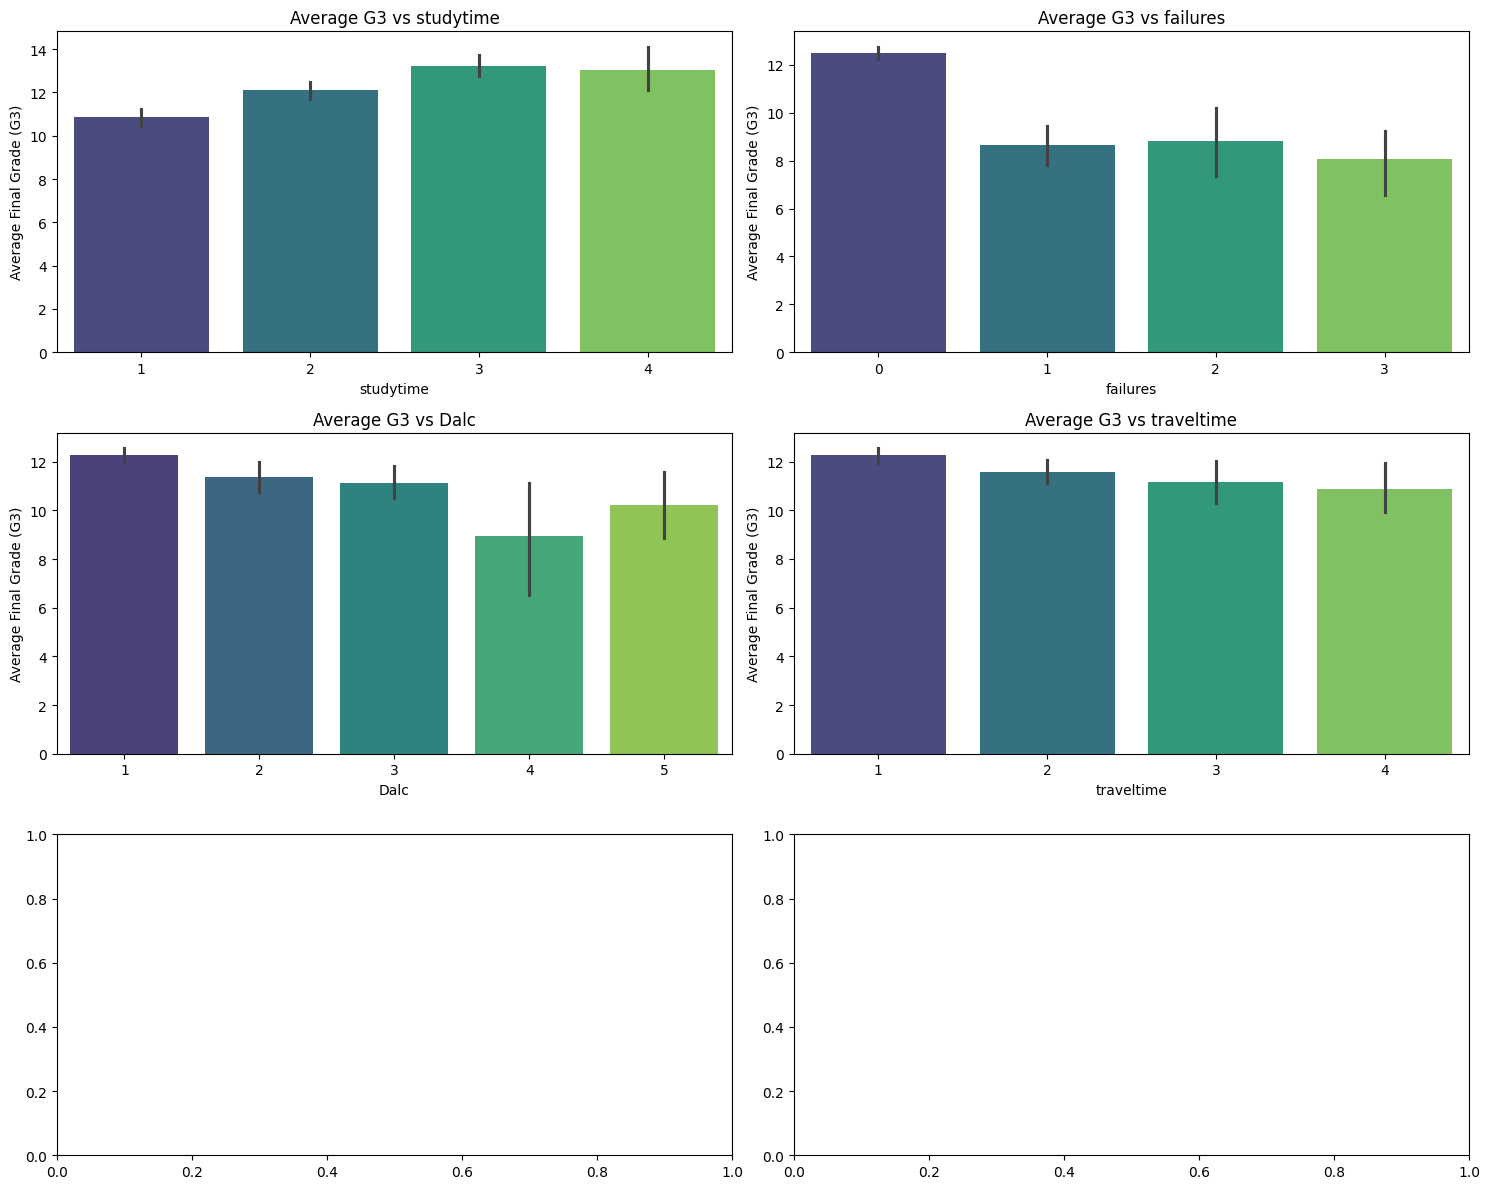

In [ ]:
categorical_plot_features = ['studytime', 'failures', 'Dalc',"traveltime"]
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axs = axs.flatten()
for i, feature in enumerate(categorical_plot_features):
    sns.barplot(x=feature, y='G3', data=df_cleaned, ax=axs[i], palette='viridis')
    axs[i].set_title(f'Average G3 vs {feature}')
    axs[i].set_ylabel('Average Final Grade (G3)')
if len(categorical_plot_features) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


### 4-HEATMAP

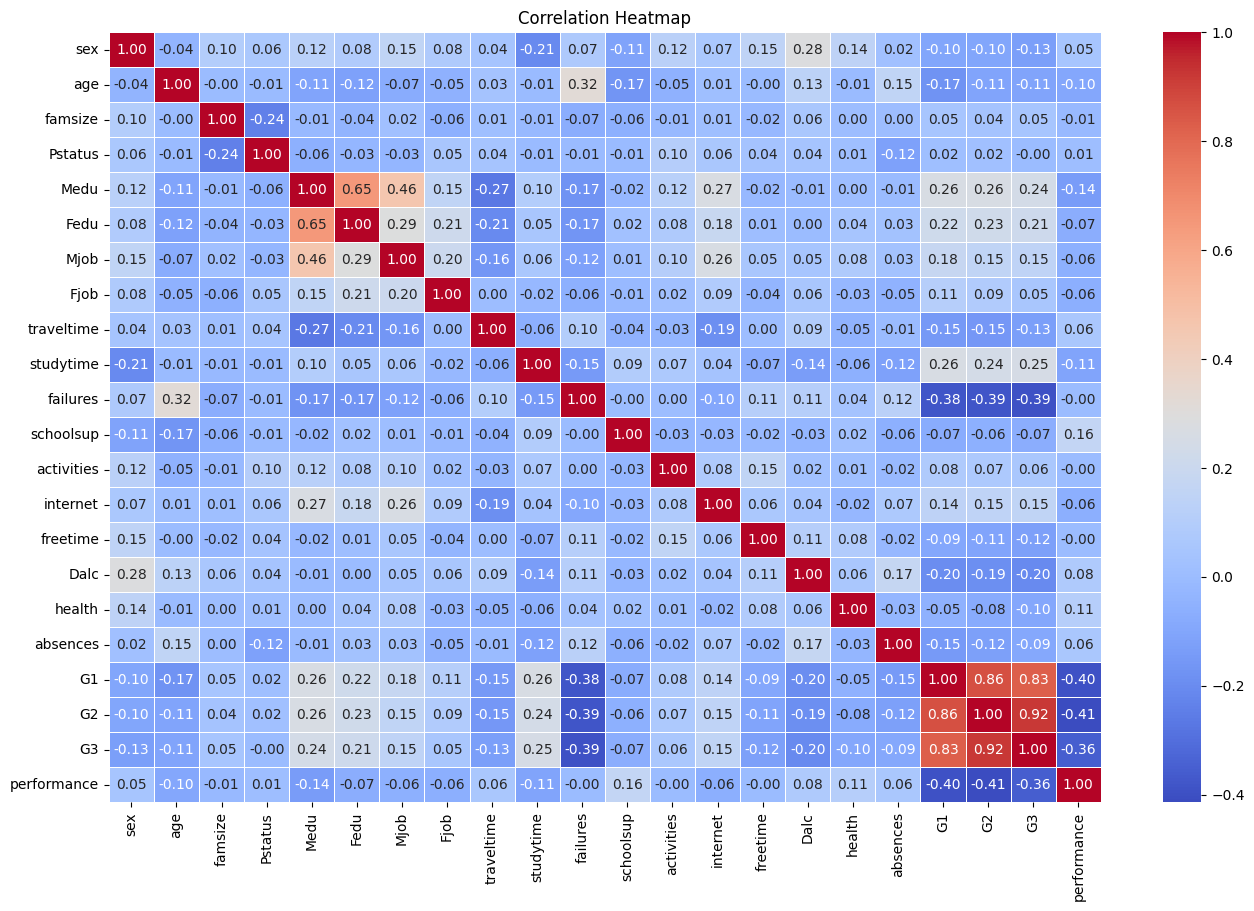

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df_cleaned.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_cleaned.to_csv("student_data_preprocessed.csv", index=False)
from google.colab import files
files.download("student_data_preprocessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cleaned.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,...,activities,internet,freetime,Dalc,health,absences,G1,G2,G3,performance
0,0,18,0,0,4,4,0,4,2,2,...,0,0,3,1,3,4,0,11,11,2
1,0,17,0,1,1,1,0,2,1,2,...,0,1,3,1,3,2,9,11,11,2
2,0,15,1,1,1,1,0,2,1,2,...,0,1,3,2,3,6,12,13,12,2
3,0,15,0,1,4,2,1,3,1,3,...,1,1,2,1,5,0,14,14,14,2
4,0,16,0,1,3,3,2,2,1,2,...,0,0,3,1,5,0,11,13,13,2


In [ ]:
df_cleaned.columns

Index(['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'activities',
       'internet', 'freetime', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3',
       'performance'],
      dtype='object')

### Splitting  the Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('performance', axis=1)
y = df_cleaned['performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## MODELS TRAINING AND EVALUATION
### 1-LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


🔹 Logistic Regression Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[32  0  0]
 [ 0 15  0]
 [ 0  0 83]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        83

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



### 2-SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("🔹 SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


🔹 SVM Results:
Accuracy: 0.9461538461538461
Precision: 0.9485280848184074
Recall: 0.9461538461538461
F1 Score: 0.9443910565368053
Confusion Matrix:
 [[30  0  2]
 [ 0 11  4]
 [ 1  0 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       1.00      0.73      0.85        15
           2       0.93      0.99      0.96        83

    accuracy                           0.95       130
   macro avg       0.97      0.89      0.92       130
weighted avg       0.95      0.95      0.94       130



In [ ]:
print(X_test.head())
print("Logistic Regression Prediction:", log_reg.predict(X_test.head()))
print("SVM Prediction:", svm.predict(X_test.head()))


     sex  age  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  traveltime  \
636    1   18        0        1     4     4     4     4           1   
220    0   16        0        0     3     1     3     2           1   
594    0   18        0        1     4     4     4     4           2   
429    1   16        1        0     4     4     0     2           1   
72     0   15        0        1     1     1     2     2           1   

     studytime  ...  schoolsup  activities  internet  freetime  Dalc  health  \
636          2  ...          0           1         1         2     1       2   
220          2  ...          0           0         1         3     2       4   
594          2  ...          0           1         1         3     1       1   
429          2  ...          0           0         0         3     1       2   
72           2  ...          1           0         1         3     2       5   

     absences  G1  G2  G3  
636         4  17  18  19  
220         2  11  11  12  
594     

### CREATING RANDOM TEST SAMPLES AND EVALUATING

In [ ]:
import pandas as pd
import numpy as np
test_samples = pd.DataFrame({
    'sex': [1, 0, 1, 0, 1],
    'age': [18, 20, 17, 15, 16],
    'famsize': [1, 0, 1, 1, 0],
    'Pstatus': [1, 0, 1, 1, 0],
    'Medu': [4, 2, 1, 3, 0],
    'Fedu': [4, 2, 2, 1, 0],
    'Mjob': [2, 3, 1, 0, 4],
    'Fjob': [3, 2, 1, 4, 0],
    'traveltime': [1, 2, 1, 1, 3],
    'studytime': [2, 3, 1, 2, 4],
    'failures': [0, 1, 2, 0, 3],
    'schoolsup': [0, 1, 1, 0, 1],
    'activities': [1, 0, 1, 0, 1],
    'internet': [1, 0, 1, 1, 0],
    'freetime': [3, 2, 4, 3, 1],
    'Dalc': [1, 2, 1, 3, 4],
    'health': [4, 3, 5, 2, 1],
    'absences': [2, 4, 6, 10, 0],
    'G1': [14, 10, 8, 15, 5],
    'G2': [15, 11, 7, 14, 6],
    'G3': [16, 12, 6, 13, 5]
})
print("=== Logistic Regression ===")
print(log_reg.predict(test_samples))
print("\n=== Support Vector Machine (SVM) ===")
print(svm.predict(test_samples))


=== Logistic Regression ===
[0 2 1 2 1]

=== Support Vector Machine (SVM) ===
[0 2 1 2 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(name, model, X_test, y_true):
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


X_custom = test_samples
y_true = [2, 1, 0, 2, 0]
evaluate_model("Logistic Regression", log_reg, X_custom, y_true)
evaluate_model("Decision Tree", dt, X_custom, y_true)
evaluate_model("Random Forest", rf, X_custom, y_true)
evaluate_model("SVM", svm, X_custom, y_true)



=== Logistic Regression ===
Accuracy: 0.2
Precision: 0.16666666666666666
Recall: 0.16666666666666666
F1 Score: 0.16666666666666666
Confusion Matrix:
 [[0 2 0]
 [0 0 1]
 [1 0 1]]

=== Decision Tree ===
Accuracy: 0.2
Precision: 0.16666666666666666
Recall: 0.16666666666666666
F1 Score: 0.16666666666666666
Confusion Matrix:
 [[0 2 0]
 [0 0 1]
 [1 0 1]]

=== Random Forest ===
Accuracy: 0.2
Precision: 0.16666666666666666
Recall: 0.16666666666666666
F1 Score: 0.16666666666666666
Confusion Matrix:
 [[0 2 0]
 [0 0 1]
 [1 0 1]]

=== SVM ===
Accuracy: 0.2
Precision: 0.16666666666666666
Recall: 0.16666666666666666
F1 Score: 0.16666666666666666
Confusion Matrix:
 [[0 2 0]
 [0 0 1]
 [1 0 1]]
